In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error


In [6]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample = pd.read_csv('data/sample_submission.csv')

In [7]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
train.drop(['PassengerId', 'Name'], inplace=True, axis=1)
train.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [9]:
test_id = test['PassengerId']
test.drop(['PassengerId', 'Name'], inplace=True, axis=1)

In [10]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [11]:
test.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [12]:
numerical_columns = train.select_dtypes(include='number').columns
numerical_columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [13]:
categorical_columns = train.select_dtypes(include='object').columns
categorical_columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'], dtype='object')

In [14]:
for column in train.columns:
    if train[column].isnull().sum().any():
        if column in numerical_columns:
            train[column] = train[column].fillna(train[column].mean())
            test[column] = test[column].fillna(test[column].mean())
        else:
            train[column] = train[column].fillna(train[column].mode()[0])
            test[column] = test[column].fillna(test[column].mode()[0])
    
    

In [15]:
print(train.isnull().sum().any())
print(test.isnull().sum().any())

False
False


In [16]:
train['Cabin'] = train['Cabin'].str.split('/')
train['Cabin_First'] = train['Cabin'].str[0]
train['Cabin_Second'] = train['Cabin'].str[1]
train['Cabin_Third'] = train['Cabin'].str[2]

In [17]:
test['Cabin'] = test['Cabin'].str.split('/')
test['Cabin_First'] = test['Cabin'].str[0]
test['Cabin_Second'] = test['Cabin'].str[1]
test['Cabin_Third'] = test['Cabin'].str[2]

In [18]:
train['Cabin_Second'] = train['Cabin_Second'].astype('int')
test['Cabin_Second'] = test['Cabin_Second'].astype('int')

In [19]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [20]:
test.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_First,Cabin_Second,Cabin_Third
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Cabin_First   8693 non-null   object 
 12  Cabin_Second  8693 non-null   int32  
 13  Cabin_Third   8693 non-null   object 
dtypes: bool(3), float64(6), int32(1), object(4)
memory usage: 738.7+ KB


In [22]:
train.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_First,Cabin_Second,Cabin_Third
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S


In [23]:
from sklearn.calibration import LabelEncoder

encoder = LabelEncoder()
train['Transported'] = encoder.fit_transform(train['Transported'])

for column in train.columns:
    if train[column].dtype == 'object' or train[column].dtype == 'bool':
        train[column] = encoder.fit_transform(train[column])
        test[column] = encoder.fit_transform(test[column])


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int32  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int32  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
 11  Cabin_First   8693 non-null   int32  
 12  Cabin_Second  8693 non-null   int32  
 13  Cabin_Third   8693 non-null   int32  
dtypes: float64(6), int32(5), int64(3)
memory usage: 781.1 KB


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int32  
 1   CryoSleep     4277 non-null   int64  
 2   Destination   4277 non-null   int32  
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   int64  
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  Cabin_First   4277 non-null   int32  
 11  Cabin_Second  4277 non-null   int32  
 12  Cabin_Third   4277 non-null   int32  
dtypes: float64(6), int32(5), int64(2)
memory usage: 351.0 KB


1    4378
0    4315
Name: Transported, dtype: int64


Text(0.5, 1.0, 'Distribution in target column')

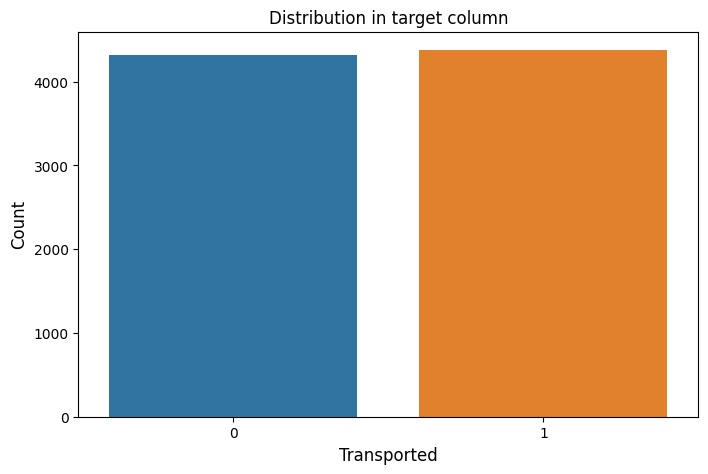

In [26]:
print(train['Transported'].value_counts())
plt.figure(figsize = (8,5))
sns.countplot(x = train['Transported'])
plt.xlabel("Transported", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Distribution in target column", size = 12)

In [27]:
correlation = train.corr()
correlation.shape

(14, 14)

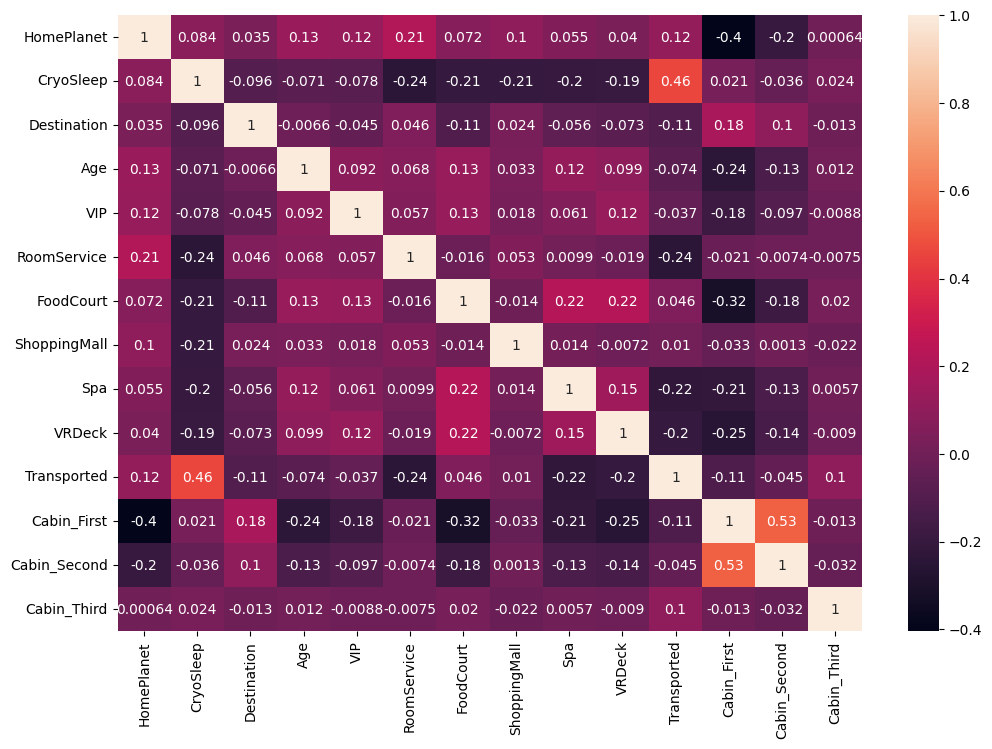

In [28]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot=True)
rel = correlation['Transported'].sort_values(ascending=False)

In [29]:
y = train['Transported']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [30]:
x = train.drop(['Transported'], axis=1)
x.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_First,Cabin_Second,Cabin_Third
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1,1


In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)

## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier


decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [33]:
train_score = decision_tree.score(xtrain, ytrain)
test_score = decision_tree.score(xtest, ytest)
print(f'Accuracy using Decision Tree on training data is {train_score}')
print(f'Accuracy using Decision Tree on test data is {test_score}')

Accuracy using Decision Tree on training data is 0.9995398067188219
Accuracy using Decision Tree on test data is 0.7428702851885924


In [34]:
predicted = decision_tree.predict_proba(xtest)[:,1]

mae = mean_squared_error(predicted, ytest)
mae

0.2572447102115915

In [35]:
models = []
models.append({
    'Name': 'Decision Tree',
    'Training Score': train_score,
    'Testing Score': test_score,
    'Mean Squared Error': mae,
})

## Decision Tree with prunning

In [73]:
params = {
    "max_depth": [i for i in range(2, 20)],
    "min_samples_leaf": [i for i in range(15, 40)],
    "min_samples_split": [i for i in range(1, 240)],
}

decision_tree = DecisionTreeClassifier()
grid = RandomizedSearchCV(estimator=decision_tree, param_distributions=params, cv=5, scoring = 'accuracy')
grid.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_leaf': [15, 16, 17, 18, 19,
                                                             20, 21, 22, 23, 24,
                                                             25, 26, 27, 28, 29,
                                                             30, 31, 32, 33, 34,
                                                             35, 36, 37, 38,
                                                             39],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20, 21, 22, 23,
                                                              24, 25, 26, 27,
                                                              28, 29, 30, ...]},
                   scoring='accuracy')

In [74]:
decision_tree_best_params = grid.best_params_
decision_tree_best_params

{'min_samples_split': 62, 'min_samples_leaf': 19, 'max_depth': 16}

In [75]:
grid.best_score_

0.7875458474779766

In [76]:
decision_tree = DecisionTreeClassifier(**decision_tree_best_params)
decision_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=16, min_samples_leaf=19, min_samples_split=62)

In [77]:
train_score = decision_tree.score(xtrain, ytrain)
test_score = decision_tree.score(xtest, ytest)
print(f"Accuracy using Decision Tree with prunning on training data is {train_score}")
print(f"Accuracy using Decision Tree with prunning on test data is {test_score}")


Accuracy using Decision Tree with prunning on training data is 0.829728485964105
Accuracy using Decision Tree with prunning on test data is 0.7690892364305428


In [78]:
predicted = decision_tree.predict_proba(xtest)[:, 1]
mae = mean_squared_error(predicted, ytest)
print(f'Mean squared error is {mae}')

Mean squared error is 0.15123296134971798


In [79]:
models.append({'Name' : 'Decision Tree with prunning', 'Training Score': train_score, 'Testing Score': test_score, 'Mean Squared Error': mae})

## Bagging

In [42]:
from sklearn.ensemble import BaggingClassifier

params = {
    "n_estimators": [i for i in range(100, 500, 50)],
    "bootstrap": [True, False],
    "bootstrap_features": [True, False],
    "warm_start": [True, False]
}

bagging_classifier = BaggingClassifier()

In [43]:
grid = RandomizedSearchCV(estimator=bagging_classifier, param_distributions=params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'bootstrap_features': [True, False],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450],
                                        'warm_start': [True, False]},
                   scoring='accuracy')

In [45]:
bagging_classifier_best_params = grid.best_params_
bagging_classifier_best_params

{'warm_start': False,
 'n_estimators': 200,
 'bootstrap_features': True,
 'bootstrap': True}

In [46]:
grid.best_score_

0.8057977343459406

In [47]:
bagging_classifier = BaggingClassifier(**bagging_classifier_best_params)
bagging_classifier.fit(xtrain, ytrain)

BaggingClassifier(bootstrap_features=True, n_estimators=200)

In [48]:
train_score = bagging_classifier.score(xtrain, ytrain)
test_score = bagging_classifier.score(xtest, ytest)
print(f"Accuracy using Bagging Classifier on training data is {train_score}")
print(f"Accuracy using Bagging Classifier on testing data is {test_score} ")

Accuracy using Bagging Classifier on training data is 0.9961650559901826
Accuracy using Bagging Classifier on testing data is 0.7934682612695492 


In [49]:
predicted = bagging_classifier.predict_proba(xtest)[:, 1]
mae = mean_squared_error(predicted, ytest)
print(f'Mean squared error is {mae}')

Mean squared error is 0.14238189713111743


In [50]:
models.append({'Name' : 'Bagging Classifier', 'Training Score': train_score, 'Testing Score': test_score, 'Mean Squared Error': mae})

## Random Forest

In [51]:
params = {
    "n_estimators": [i for i in range(100, 1000, 50)],
    "max_depth": [i for i in range(2, 15)],
    "min_samples_leaf": [i for i in range(15, 40)],
    "min_samples_split": [i for i in range(5, 240)]
}

random_forest = RandomForestClassifier(max_features='sqrt')

In [52]:
grid = RandomizedSearchCV(estimator = random_forest, param_distributions = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14],
                                        'min_samples_leaf': [15, 16, 17, 18, 19,
                                                             20, 21, 22, 23, 24,
                                                             25, 26, 27, 28, 29,
                                                             30, 31, 32, 33, 34,
                                                             35, 36, 37, 38,
                                                             39],
                                        'min_samples_split': [5, 6, 7, 8, 9, 10,
                                                              11, 12, 13, 14,
                                                              15, 16, 17, 18,
                                                              19, 20, 21, 22,
                                                              23, 24, 25, 26,
                                                              27, 28, 29, 30,
                                                              31, 32, 33, 34, ...],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 950]},
                   scoring='accuracy')

In [53]:
random_forest_best_params = grid.best_params_
random_forest_best_params

{'n_estimators': 900,
 'min_samples_split': 34,
 'min_samples_leaf': 27,
 'max_depth': 13}

In [54]:
grid.best_score_

0.8001243002227045

In [55]:
random_forest = RandomForestClassifier(**random_forest_best_params)
random_forest.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=13, min_samples_leaf=27, min_samples_split=34,
                       n_estimators=900)

In [56]:
train_score = random_forest.score(xtrain, ytrain)
test_score = random_forest.score(xtest, ytest)
print(f"Accuracy using Random Forest on training data is {train_score}")
print(f"Accuracy using Random Forest testing data is {test_score} ")

Accuracy using Random Forest on training data is 0.8196042337781868
Accuracy using Random Forest testing data is 0.7907083716651334 


In [57]:
predicted = random_forest.predict_proba(xtest)[:, 1]
mae = mean_squared_error(predicted, ytest)
print(f'Mean squared error is {mae}')

Mean squared error is 0.14406028191190323


In [58]:
models.append({'Name' : 'Random Forest', 'Training Score': train_score, 'Testing Score': test_score, 'Mean Squared Error': mae})

# Boosting

In [4]:
a = np.arange(0.1, 1.5, 0.1)
print(a)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4]


## AdaBoost

In [5]:
from sklearn.ensemble import AdaBoostClassifier

param_grid = {
    'n_estimators': [i for i in range(30, 250, 10)],
    'learning_rate': np.arange(0.1, 1.5, 0.1),
    'algorithm': ['SAMME', 'SAMME.R']
}

adaboost = AdaBoostClassifier()
adaboost

AdaBoostClassifier()

In [ ]:
grid = RandomizedSearchCV(estimator=adaboost, param_distributions= param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(xtrain, ytrain)

In [ ]:
print(f'Randomized Search best score is {grid.best_score_}')

In [ ]:
best_params_adaboost = grid.best_params_
best_params_adaboost

In [ ]:
adaboost = AdaBoostClassifier(**best_params_adaboost)
adaboost.fit(xtrain, ytrain)

In [ ]:
train_score = adaboost.score(xtrain, ytrain)
test_score = adaboost.score(xtest, ytest)
print(f"Accuracy using AdaBoost on training data is {train_score}")
print(f"Accuracy using AdaBoost on test data is {test_score}")

In [ ]:
predicted = adaboost.predict_proba(xtest)[:,1]
mae = mean_squared_error(predicted, ytest)
mae

In [ ]:
models.append({
    'Name': 'AdaBoost Classifier',
    'Training Score': train_score,
    'Testing Score': test_score,
    'Mean Squared Error': mae,
})

## XGBoost

In [59]:
from xgboost import XGBClassifier

param_grid = {
            'n_estimators': [i for i in range(100, 250, 10)],
            'learning_rate': [0.2, 0.15, 0.1, 0.05],
            'booster' : ['gbtree', 'gblinear'],
            'verbosity': [0, 1, 2, 3],
            'validate_parameters': [True, False],
            'gamma': [0, 1, 10, 100],
            }

xgbc = XGBClassifier()
xgbc

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
grid = RandomizedSearchCV(estimator = xgbc, param_distributions = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'gamma': [0, 1, 10, 100],
                                        'learning_rate': [0.2, 0.15, 0.1, 0.05],
                                        'n_estimators': [100, 110, 120, 130,
                                                         140, 150, 160, 170,
                                                         180, 190, 200, 210,
                                                         220, 230, 240],
                                        'validate_parameters': [True, False],
                                        'verbosity': [0, 1, 2, 3]},
                   scoring='accuracy')

In [61]:
print(f'Randomized Search best score is {grid.best_score_}')

Randomized Search best score is 0.8048769004044466


In [62]:
best_params_xgboost = grid.best_params_
best_params_xgboost

{'verbosity': 1,
 'validate_parameters': True,
 'n_estimators': 140,
 'learning_rate': 0.1,
 'gamma': 0,
 'booster': 'gbtree'}

In [63]:
xgbc = XGBClassifier(**best_params_xgboost)
xgbc.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [64]:
train_score = xgbc.score(xtrain, ytrain)
test_score = xgbc.score(xtest, ytest)
print(f"Accuracy using XGBoost on training data is {train_score}")
print(f"Accuracy using XGBoost on test data is {test_score}")

Accuracy using XGBoost on training data is 0.8979904893388556
Accuracy using XGBoost on test data is 0.8072677092916284


In [65]:
predicted = xgbc.predict_proba(xtest)[:,1]
mae = mean_squared_error(predicted, ytest)
mae

0.1302048557018479

In [66]:
models.append({
    'Name': 'XGBoost Classifier',
    'Training Score': train_score,
    'Testing Score': test_score,
    'Mean Squared Error': mae,
})

## For comparison: CatBoost
CatBoost is the Spaceship Titanic Kaggle competition winner with test accuracy of 81% which is slighly better than the other models

In [68]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()

cat.fit(xtrain, ytrain, verbose = 50, early_stopping_rounds=150)

Learning rate set to 0.02294
0:	learn: 0.6803738	total: 146ms	remaining: 2m 25s
50:	learn: 0.4704435	total: 296ms	remaining: 5.5s
100:	learn: 0.4226948	total: 453ms	remaining: 4.03s
150:	learn: 0.3980842	total: 597ms	remaining: 3.36s
200:	learn: 0.3834001	total: 740ms	remaining: 2.94s
250:	learn: 0.3712432	total: 884ms	remaining: 2.64s
300:	learn: 0.3615061	total: 1.03s	remaining: 2.38s
350:	learn: 0.3538507	total: 1.17s	remaining: 2.16s
400:	learn: 0.3463609	total: 1.31s	remaining: 1.96s
450:	learn: 0.3397759	total: 1.46s	remaining: 1.77s
500:	learn: 0.3335915	total: 1.6s	remaining: 1.59s
550:	learn: 0.3272718	total: 1.74s	remaining: 1.42s
600:	learn: 0.3211415	total: 1.89s	remaining: 1.26s
650:	learn: 0.3146767	total: 2.04s	remaining: 1.09s
700:	learn: 0.3091865	total: 2.18s	remaining: 932ms
750:	learn: 0.3039089	total: 2.33s	remaining: 772ms
800:	learn: 0.2989430	total: 2.47s	remaining: 614ms
850:	learn: 0.2942007	total: 2.62s	remaining: 459ms
900:	learn: 0.2897145	total: 2.78s	rema

In [69]:
train_score = cat.score(xtrain, ytrain)
test_score = cat.score(xtest, ytest)
print(f'Accuracy using CatBoost on training data is {train_score}')
print(f'Accuracy using CatBoost on test data is {test_score}')

Accuracy using CatBoost on training data is 0.8803497468936954
Accuracy using CatBoost on test data is 0.8114075436982521


In [70]:
predicted = cat.predict(xtest)
mae = mean_squared_error(predicted, ytest)
mae

0.18859245630174792

In [71]:
models.append({
    'Name': 'CatBoost',
    'Training Score': train_score,
    'Testing Score': test_score,
    'Mean Squared Error': mae,
})

In [86]:
results = pd.DataFrame(models)
results

,Name,Training Score,Testing Score,Mean Squared Error
0,Decision Tree with prunning,0.829728,0.769089,0.151233
1,Decision Tree,0.999540,0.742870,0.257245
2,Bagging Classifier,0.996165,0.793468,0.142382
3,Random Forest,0.819604,0.790708,0.144060
4,XGBoost Classifier,0.897990,0.807268,0.130205
5,CatBoost,0.880350,0.811408,0.188592
